In [49]:
import csv
import pandas as pd
import requests
from bs4 import BeautifulSoup

#  Sksquare 주식 페이지 이동
url = 'https://finance.yahoo.com/quote/402340.KS/history?p=402340.KS'
response = requests.get(url)

filename = "data.csv"
f= open(filename, "w", encoding="utf-8-sig", newline="")
writer=csv.writer(f)

title ="Date	Open	High	Low	Close	Adj Close	Volume".split("\t")
writer.writerow(title)

headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}
res=requests.get(url,headers= headers)
res.raise_for_status()
soup = BeautifulSoup(res.text, "lxml")

data_rows = soup.find("table", attrs={"class":"W(100%) M(0)"}).find("tbody").find_all("tr")

for row in data_rows:
    columns = row.find_all("td")
    data = [column.get_text().strip() for column in columns]
    print(data)
    writer.writerow(data)

['Nov 30, 2022', '36,450.00', '37,800.00', '36,200.00', '37,450.00', '37,450.00', '1,052,178']
['Nov 29, 2022', '36,000.00', '36,850.00', '36,000.00', '36,650.00', '36,650.00', '206,096']
['Nov 28, 2022', '36,950.00', '36,950.00', '36,100.00', '36,450.00', '36,450.00', '270,040']
['Nov 25, 2022', '37,500.00', '37,500.00', '36,950.00', '37,100.00', '37,100.00', '161,473']
['Nov 24, 2022', '37,600.00', '37,700.00', '37,150.00', '37,450.00', '37,450.00', '178,901']
['Nov 23, 2022', '36,900.00', '37,450.00', '36,850.00', '37,450.00', '37,450.00', '260,624']
['Nov 22, 2022', '37,150.00', '37,150.00', '36,400.00', '36,650.00', '36,650.00', '329,707']
['Nov 21, 2022', '38,500.00', '38,700.00', '37,000.00', '37,250.00', '37,250.00', '441,516']
['Nov 18, 2022', '39,400.00', '39,700.00', '38,500.00', '38,500.00', '38,500.00', '303,755']
['Nov 17, 2022', '39,750.00', '40,050.00', '39,150.00', '39,200.00', '39,200.00', '219,751']
['Nov 16, 2022', '40,350.00', '40,450.00', '39,450.00', '40,450.00',

In [58]:
df = pd.read_csv('data.csv',thousands = ',')
df[['Open','High','Low','Volume', 'Close']].astype(float)

,Open,High,Low,Volume,Close
0,36450.0,37800.0,36200.0,1052178.0,37450.0
1,36000.0,36850.0,36000.0,206096.0,36650.0
2,36950.0,36950.0,36100.0,270040.0,36450.0
3,37500.0,37500.0,36950.0,161473.0,37100.0
4,37600.0,37700.0,37150.0,178901.0,37450.0
...,...,...,...,...,...
95,39950.0,41150.0,39700.0,464437.0,40600.0
96,39400.0,39950.0,39100.0,218356.0,39500.0
97,39800.0,40150.0,39250.0,220225.0,39800.0
98,39950.0,40650.0,39500.0,577243.0,39800.0


In [101]:
# Volume 범주화
import math
def Volume_ceil(x):
    return math.ceil(x//100000)*100000 #올림
    
df['Volume_range']=df['Volume'].apply(Volume_ceil)


In [104]:
df.groupby("Volume_range").sum()

,Open,High,Low,Close,Adj Close,Volume
Volume_range,,,,,,
100000,401200.0,404600.0,397000.0,399750.0,399750.0,1788173
200000,1404850.0,1419800.0,1388100.0,1405150.0,1405150.0,8824614
300000,1152300.0,1169050.0,1135750.0,1150150.0,1150150.0,10027563
400000,555500.0,566850.0,547300.0,557850.0,557850.0,6358624
500000,303600.0,309300.0,297300.0,303950.0,303950.0,4419665
600000,42650.0,43650.0,42600.0,43400.0,43400.0,604778
900000,37400.0,38800.0,36200.0,36850.0,36850.0,935373
1000000,36450.0,37800.0,36200.0,37450.0,37450.0,1052178
2300000,39850.0,45850.0,39550.0,42100.0,42100.0,2362582


In [105]:
df.groupby("Volume_range").mean()

,Open,High,Low,Close,Adj Close,Volume
Volume_range,,,,,,
100000,40120.000000,40460.000000,39700.000000,39975.000000,39975.000000,1.788173e+05
200000,40138.571429,40565.714286,39660.000000,40147.142857,40147.142857,2.521318e+05
300000,39734.482759,40312.068966,39163.793103,39660.344828,39660.344828,3.457780e+05
400000,39678.571429,40489.285714,39092.857143,39846.428571,39846.428571,4.541874e+05
500000,37950.000000,38662.500000,37162.500000,37993.750000,37993.750000,5.524581e+05
600000,42650.000000,43650.000000,42600.000000,43400.000000,43400.000000,6.047780e+05
900000,37400.000000,38800.000000,36200.000000,36850.000000,36850.000000,9.353730e+05
1000000,36450.000000,37800.000000,36200.000000,37450.000000,37450.000000,1.052178e+06
2300000,39850.000000,45850.000000,39550.000000,42100.000000,42100.000000,2.362582e+06


In [133]:
group_volumecount=df.groupby("Volume_range").count().iloc[:,0]
df.groupby("Volume_range").count()

,Date,Open,High,Low,Close,Adj Close,Volume
Volume_range,,,,,,,
100000,10,10,10,10,10,10,10
200000,35,35,35,35,35,35,35
300000,29,29,29,29,29,29,29
400000,14,14,14,14,14,14,14
500000,8,8,8,8,8,8,8
600000,1,1,1,1,1,1,1
900000,1,1,1,1,1,1,1
1000000,1,1,1,1,1,1,1
2300000,1,1,1,1,1,1,1


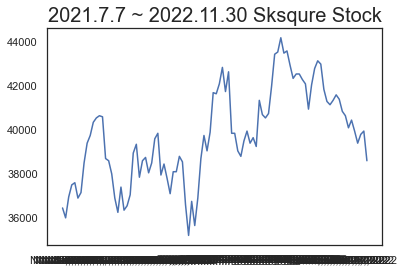

In [144]:
import matplotlib.pyplot as plt
plt.title("2021.7.7 ~ 2022.11.30 Sksqure Stock",size=20)
plt.plot(df.Date,df.Open, label="stock")

Text(0.5, 1.0, 'Volume_range count')

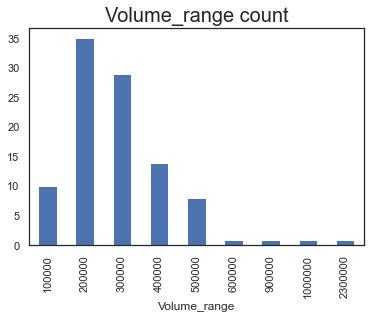

In [142]:
plt.title("Volume_range count",size=20)
group_volumecount.plot(kind="bar")


Text(0.5, 1.0, 'Volume_range count')

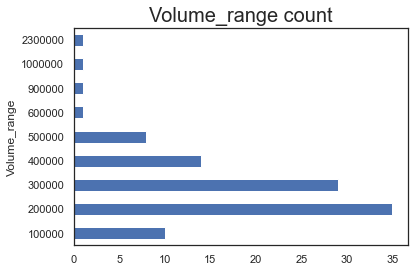

In [141]:
plt.title("Volume_range count",size=20)
group_volumecount.plot(kind="barh")


<AxesSubplot:title={'center':'Volume_range count'}>

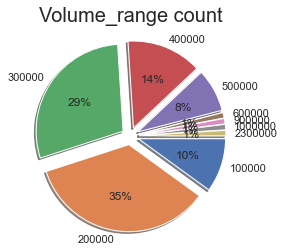

In [148]:
plt.title("Volume_range count",size=20)
group_volumecount.plot(kind="pie",ylabel="",autopct='%.f%%',startangle=0, counterclock=False, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), shadow=True)


In [129]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Volume_range
Open,1.000000,0.947634,0.980611,0.943925,0.943925,-0.157182,-0.146620
High,0.947634,1.000000,0.949927,0.966552,0.966552,0.103315,0.110082
Low,0.980611,0.949927,1.000000,0.975636,0.975636,-0.161544,-0.153187
Close,0.943925,0.966552,0.975636,1.000000,1.000000,-0.046597,-0.040251
Adj Close,0.943925,0.966552,0.975636,1.000000,1.000000,-0.046597,-0.040251
Volume,-0.157182,0.103315,-0.161544,-0.046597,-0.046597,1.000000,0.993791
Volume_range,-0.146620,0.110082,-0.153187,-0.040251,-0.040251,0.993791,1.000000


Text(0.5, 1.0, 'Sksquare Stock')

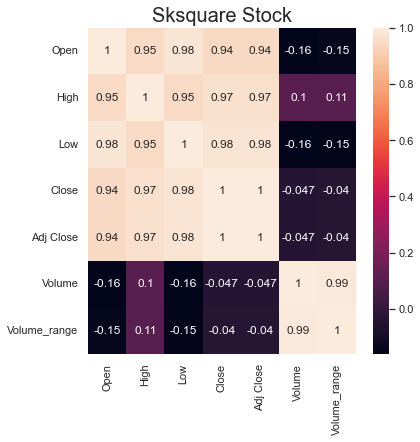

In [131]:
import seaborn as sns

cor=df.corr()
sns.set(style="white")
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cor, annot=True)

plt.title('Sksquare Stock', size=20)

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [61]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
0,0.138889,0.125000,0.163743,0.409816
1,0.088889,0.021739,0.140351,0.028754
2,0.194444,0.032609,0.152047,0.057554
3,0.255556,0.092391,0.251462,0.008657
4,0.266667,0.114130,0.274854,0.016506
...,...,...,...,...
95,0.527778,0.489130,0.573099,0.145107
96,0.466667,0.358696,0.502924,0.034276
97,0.511111,0.380435,0.520468,0.035118
98,0.527778,0.434783,0.549708,0.195913


In [62]:
dfx.describe()

,Open,High,Low,Volume
count,100.000000,100.000000,100.000000,100.000000
mean,0.504222,0.402935,0.514620,0.099753
std,0.237232,0.231817,0.253979,0.111852
min,0.000000,0.000000,0.000000,0.000000
25%,0.322222,0.250000,0.330409,0.049980
50%,0.505556,0.372283,0.508772,0.077368
75%,0.684722,0.576087,0.716374,0.124057
max,1.000000,1.000000,1.000000,1.000000


In [63]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [64]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.7111111111032098, 0.5815217391241139, 0.771929824552375, 0.054796359099770986], [0.6888888888812346, 0.5760869565154773, 0.7017543859567046, 0.1343858795764533], [0.6277777777708025, 0.4619565217341091, 0.6315789473610341, 0.03550913602932737], [0.6055555555488271, 0.5217391304291115, 0.6783625730914811, 0.05885971905076908], [0.544444444438395, 0.4239130434736531, 0.49707602338599904, 0.12372305017722032], [0.5833333333268518, 0.4184782608650165, 0.5847953216305871, 0.08499322172829782], [0.5277777777719135, 0.489130434777292, 0.5730994151979754, 0.1451068084473864], [0.46666666666148143, 0.35869565217001415, 0.5029239766023049, 0.03427598600207923], [0.5111111111054321, 0.3804347826045605, 0.5204678362512225, 0.03511775276647908], [0.5277777777719135, 0.4347826086909262, 0.549707602332752, 0.19591276972341065]] -> [0.4812499999939844]


In [65]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (62, 10, 4) (62, 1)
테스트 데이터의 크기 : (28, 10, 4) (28, 1)


In [66]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout_4 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_5 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
3/3 [==============================] - 2s 5ms/step - loss: 0.0264
Epoch 2/70
3/3 [==============================] - 0s 5ms/step - loss: 0.0273
Epoch 3/70
3/3 [==============================] - 0s 5ms/step - loss: 0.0275
Epoch 4/70
3/3 [==============================] - 0s 5ms/step - loss: 0.0340
Epoch 5/70
3/3 [==============================] - 0s 4ms/step - loss: 0.0278
Epoch 6/70
3/3 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 7/70
3/3 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 8/70
3/3 [==============================] - 0s 4ms/step - loss: 0.0307
Epoch 9/70
3/3 [==============================] - 0s 4ms/step - loss: 0.0319
Epoch 10/70
3/3 [==============================] - 0s 5ms/step - loss: 0.0272
Epoch 11/70
3/3 [==============================] - 0s 4ms/step - loss: 0.0248
Epoch 12/70
3/3 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 13/70
3/3 [==============================] - 0s 5ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step


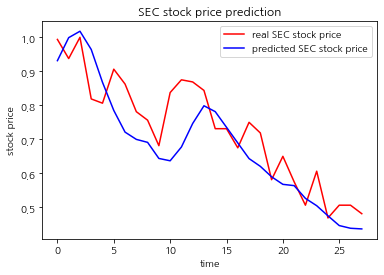

내일 SEC 주가 : [35916.016] KRW


In [83]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
print("내일 SEC 주가 :", df.Close.iloc[-1] * pred_y[-1] / dfy.Close.iloc[-1], 'KRW')

In [91]:
score = model.evaluate(train_X, train_y)
score

2/2 [==============================] - 0s 8ms/step - loss: 0.0152


0.01521223783493042

In [92]:
import sklearn.metrics as sm
print(sm.mean_squared_error(test_y, pred_y))
print(sm.mean_absolute_error(test_y, pred_y))

0.008138950661583955
0.07274716581351737
